# Week 1 Task

#### Data Set

In [75]:
import numpy as np

def data(n):
	x = np.random.randint(10001, size = n)
	return x	
n = 20 # Value of n goes here
data_set = data(n)
print("Data Set: ", data_set)

Data Set:  [3322  852 1033 2013 8542 1651 8456 2154 2313 5001 2304 6663 7076 1873
 9585 5102  197 7258 4403 9266]


### Write a code to find the mean, median, mode, sum, variance, and standard deviation of a given dataset of numbers.

In [76]:
# MEAN
print("Mean:", np.mean(data_set))

#MEDIAN
print("Median:", np.median(data_set))

#MODE
vals, counts = np.unique(data_set, return_counts=True)
mode = vals[np.argmax(counts)]
print("Mode:", mode)

#SUM
print("Sum:", np.sum(data_set))

#VARIANCE
print("Var:", np.var(data_set))

#STANDARD DEVIATION
print("Sigma:", np.std(data_set))


Mean: 4453.2
Median: 3862.5
Mode: 197
Sum: 89064
Var: 9080164.259999998
Sigma: 3013.331090338398


### Implement Quick Sort

In [72]:
def QuickSort(nparray):
	k = 0
	if len(nparray) == 0:
		return nparray
	for i in range(len(nparray)-1):
		if nparray[i] <= nparray[-1]:
			nparray[i], nparray[k] = nparray[k], nparray[i]
			k+=1
	nparray[-1], nparray[k] = nparray[k], nparray[-1]
	QuickSort(nparray[:k])
	QuickSort(nparray[k+1:])

In [74]:
n = 20 #Enter the value of n here
nparray = data(n)
print("Initial Array: ", nparray)
QuickSort(nparray)
print("Sorted Array: ", nparray)

Initial Array:  [5563 7674 8070 4396 5947 5633 3290 8927 3511 3464 9139 6369 9230 6372
  640 6924 4277 2267 3436 1467]
Sorted Array:  [ 640 1467 2267 3290 3436 3464 3511 4277 4396 5563 5633 5947 6369 6372
 6924 7674 8070 8927 9139 9230]


### Perform PCA to identify best-fit line through the following datasets. Utilize the matplotlib library to display your results.

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def data1():
	x = [np.random.rand() for i in range(1000)]
	y = [x[i] + 0.05*np.random.rand() for i in range(1000)]
	return [x, y]

def data2():
	x = [np.random.rand() for i in range(1000)]
	y = [(x[i])**2 + 0.05*np.random.rand() for i in range(1000)]
	return [x, y]

In [57]:
# Standardisation of Data
def std_data(nparray):
    x, y = nparray[0], nparray[1]
    x_std = (x - np.mean(x))/np.std(x)
    y_std = (y - np.mean(y))/np.std(y)
    return np.array([x_std, y_std])

def DimReduction(arr):
    data_set = np.array(arr)
    std_data_set = std_data(data_set)
    
    # Computing the covariance matrix
    cov_matrix = np.cov(std_data_set)
    
    # Computing the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
    eigen_data = np.linalg.eigh(cov_matrix)
    
    # Creating a feature vector to decide which principal components to keep
    u = eigen_data[1][:][-1] # Retaining the eigenvector corresponding to greatest eigenvalue
    
    # Recasting the data along the principal components axes
    m = u[1]/u[0]*np.std(data_set[1])/np.std(data_set[0])
    c = np.mean(data_set[1] - data_set[0]*m)
    
    # Displaying the result using matplotlib
    plt.scatter(data_set[0], data_set[1], color = "red")
    plt.plot(data_set[0], data_set[0]*m + c)
    print("Slope =", m, "Intercept =", c)
    plt.title("Best Fit Line")
    plt.show()

#### For linear data set

Slope = 1.0011397902179877 Intercept = 0.02465151617522509


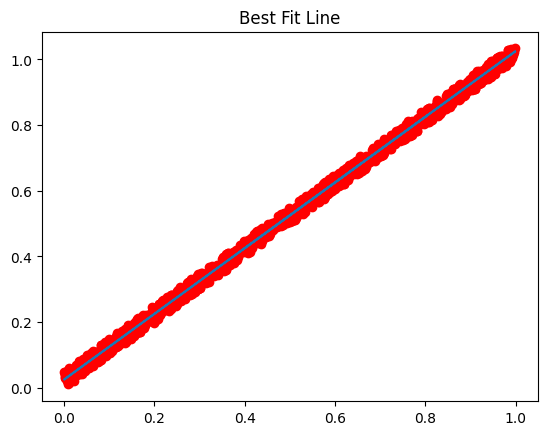

In [61]:
DimReduction(data1())

#### For parabolic data set

Slope = 1.036076126486541 Intercept = -0.1618879474304496


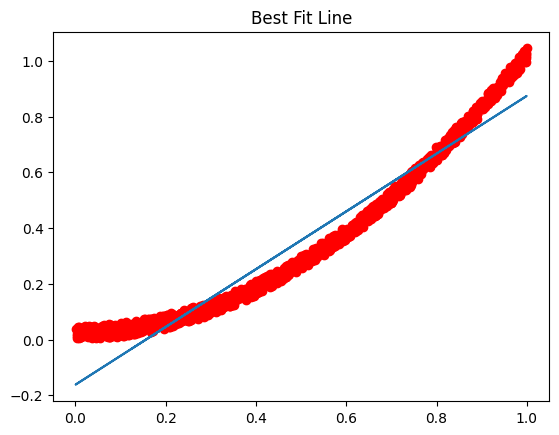

In [59]:
DimReduction(data2())